In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split




In [2]:
housing = pd.read_csv("datasets/housing/housing.csv")

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.tail(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20630,-121.32,39.29,11.0,2640.0,505.0,1257.0,445.0,3.5673,112000.0,INLAND
20631,-121.40,39.33,15.0,2655.0,493.0,1200.0,432.0,3.5179,107200.0,INLAND
20632,-121.45,39.26,15.0,2319.0,416.0,1047.0,385.0,3.1250,115600.0,INLAND
20633,-121.53,39.19,27.0,2080.0,412.0,1082.0,382.0,2.5495,98300.0,INLAND
20634,-121.56,39.27,28.0,2332.0,395.0,1041.0,344.0,3.7125,116800.0,INLAND
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Notice that the **total_bedrooms** attribute(feature)has only 20,433 non-null values, meaning that 207 districts are missing this feature.We will need to take care of this later.

In [6]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002148EE950F0>,
      dtype=object)

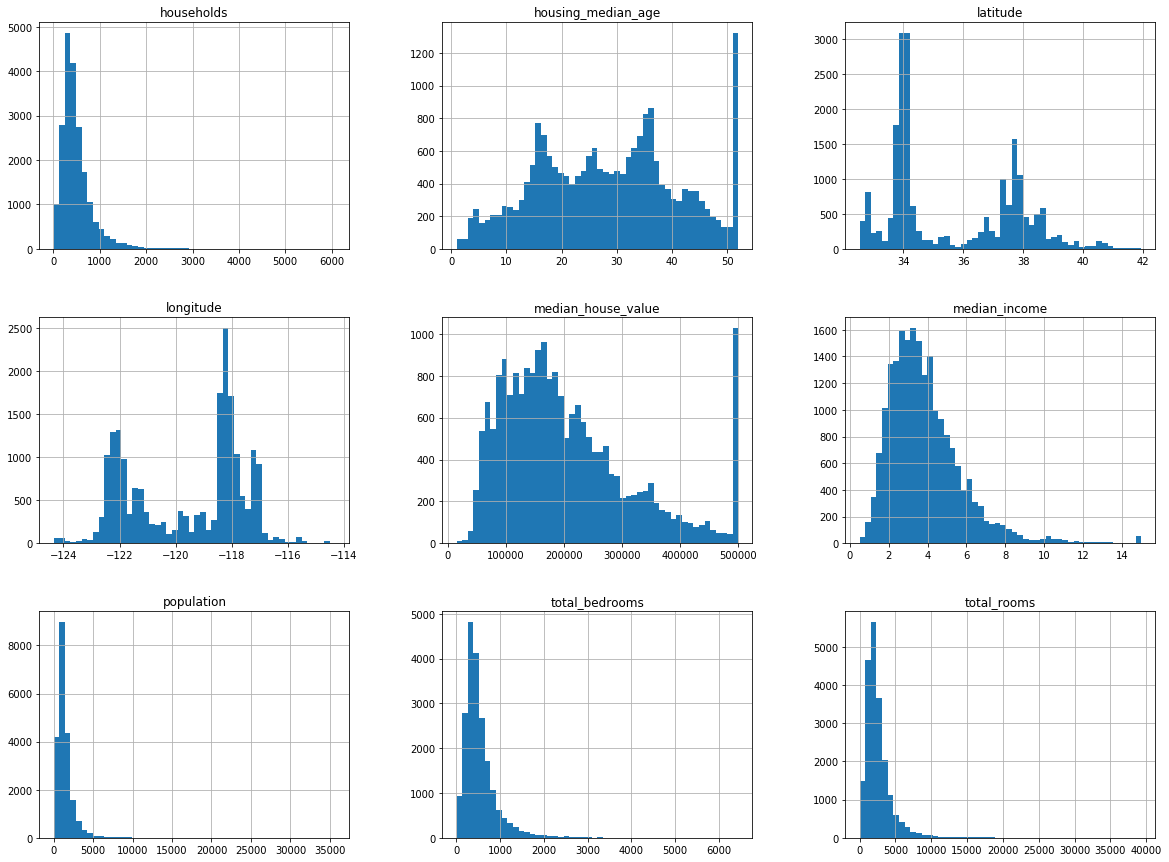

In [8]:
housing.hist(bins=50, figsize=(20,15))


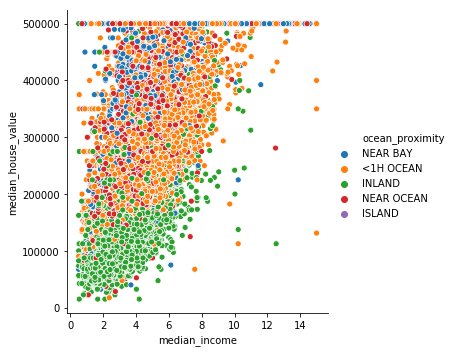

In [9]:
sns.relplot(x="median_income", y="median_house_value", hue="ocean_proximity", data=housing)

#### Create Test Set

Please refer the text book for more detailes regrading stratified split. And how to use the`StratifiedShuffleSplit`class.Here we are not using it for simplicity sake, but it is an important topic to discuss and understand how to use it, may be in some future projects.

In [10]:
train_set, test_set = train_test_split(housing, test_size=0.20, random_state=24)

In [11]:
train_set.shape


(16512, 10)

In [12]:
test_set.shape


(4128, 10)

In [13]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 3950 to 12580
Data columns (total 10 columns):
longitude             4128 non-null float64
latitude              4128 non-null float64
housing_median_age    4128 non-null float64
total_rooms           4128 non-null float64
total_bedrooms        4085 non-null float64
population            4128 non-null float64
households            4128 non-null float64
median_income         4128 non-null float64
median_house_value    4128 non-null float64
ocean_proximity       4128 non-null object
dtypes: float64(9), object(1)
memory usage: 354.8+ KB


In [14]:
train_set[:10]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19464,-120.97,37.69,16.0,2793.0,476.0,1279.0,477.0,3.4667,160900.0,INLAND
13265,-117.65,34.10,30.0,1461.0,341.0,1014.0,345.0,2.4667,106000.0,INLAND
5829,-118.30,34.19,52.0,2962.0,468.0,1364.0,466.0,4.9042,343500.0,<1H OCEAN
5111,-118.31,33.96,48.0,2015.0,356.0,1020.0,338.0,4.0625,138700.0,<1H OCEAN
19761,-122.17,40.11,24.0,1631.0,340.0,1042.0,333.0,1.7708,59000.0,INLAND
19608,-121.12,37.48,5.0,4109.0,820.0,3062.0,713.0,3.2396,125200.0,INLAND
5678,-118.30,33.72,35.0,2790.0,NaN,1167.0,441.0,6.2028,361500.0,NEAR OCEAN
11922,-117.38,33.96,30.0,3153.0,623.0,1544.0,575.0,3.4491,133800.0,INLAND
16070,-122.49,37.75,45.0,2341.0,461.0,1092.0,438.0,4.8036,297800.0,NEAR OCEAN
6446,-118.04,34.11,37.0,1275.0,177.0,598.0,174.0,7.1885,500001.0,INLAND


In [15]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
19464,-120.97,37.69,16.0,2793.0,476.0,1279.0,477.0,3.4667,160900.0,INLAND
13265,-117.65,34.10,30.0,1461.0,341.0,1014.0,345.0,2.4667,106000.0,INLAND
5829,-118.30,34.19,52.0,2962.0,468.0,1364.0,466.0,4.9042,343500.0,<1H OCEAN
5111,-118.31,33.96,48.0,2015.0,356.0,1020.0,338.0,4.0625,138700.0,<1H OCEAN
19761,-122.17,40.11,24.0,1631.0,340.0,1042.0,333.0,1.7708,59000.0,INLAND


### Visualize the housing dataset and  Discover and gain some insights

In [16]:
housing = train_set.copy()

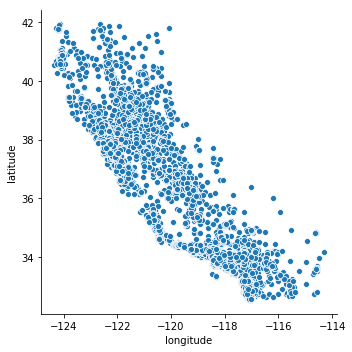

In [17]:
sns.relplot( x="longitude", y="latitude",kind="scatter", data=housing)

note the map looks almost like a perfect California, that is right !

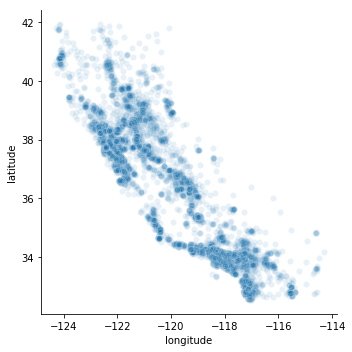

In [18]:
sns.relplot( x="longitude", y="latitude",kind="scatter",alpha=.1, data=housing)

More generally, our brains are very good at spotting patterns on pictures,but you may need to play around with visulaization parameters in Pandas and Seaborn libraries to make plots stand out.

Let's look at the housing prices, the radius of each circle represents the disrtrict's population (option `s` , s for size)and the color represents the price(option `c`, c for color). we will use a pre-defined color map (option `cmap`) called jet, which ranges from blue(low values) to red (high values).

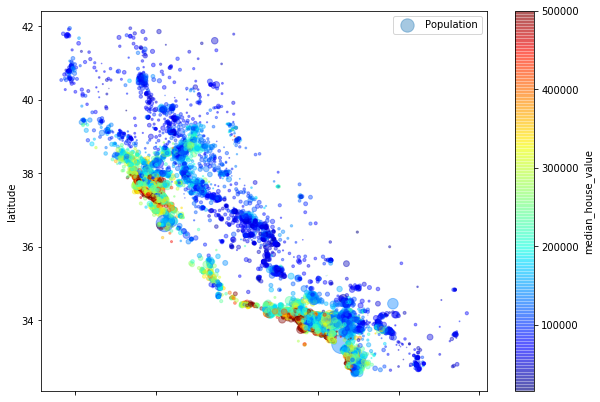

In [19]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,
             label="Population",figsize=(10,7),c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
#plt.legend()

### Looking for correlations

Since the dataset is not too large, you can easily compute the **standard correlation coefficent** between every pair of attributes using the `corr()`method:

In [20]:
corr_matrix = housing.corr()

In [21]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925003,-0.106292,0.040492,0.066258,0.097050,0.052098,-0.017669,-0.045107
latitude,-0.925003,1.000000,0.009304,-0.035033,-0.066661,-0.108077,-0.070458,-0.078137,-0.146054
housing_median_age,-0.106292,0.009304,1.000000,-0.359119,-0.316259,-0.292766,-0.299365,-0.123945,0.107475
total_rooms,0.040492,-0.035033,-0.359119,1.000000,0.931630,0.855426,0.919291,0.199389,0.137900
total_bedrooms,0.066258,-0.066661,-0.316259,0.931630,1.000000,0.875602,0.979789,-0.005070,0.054245
population,0.097050,-0.108077,-0.292766,0.855426,0.875602,1.000000,0.904529,0.007767,-0.020036
households,0.052098,-0.070458,-0.299365,0.919291,0.979789,0.904529,1.000000,0.015941,0.070494
median_income,-0.017669,-0.078137,-0.123945,0.199389,-0.005070,0.007767,0.015941,1.000000,0.684882
median_house_value,-0.045107,-0.146054,0.107475,0.137900,0.054245,-0.020036,0.070494,0.684882,1.000000


In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.684882
total_rooms           0.137900
housing_median_age    0.107475
households            0.070494
total_bedrooms        0.054245
population           -0.020036
longitude            -0.045107
latitude             -0.146054
Name: median_house_value, dtype: float64

Another way to check for correlation between attribtes is to use Pandas `scatter_matrix`function,which plots every numerical attribute against every other numerical attribute.Since there are 9 attributes, you would get 9x9 = 81 plots, whch would not fit on a page.So let us focus on few promising attributes that seem most correlated with median housing value.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002148FC8C5F8>,
      dtype=object)

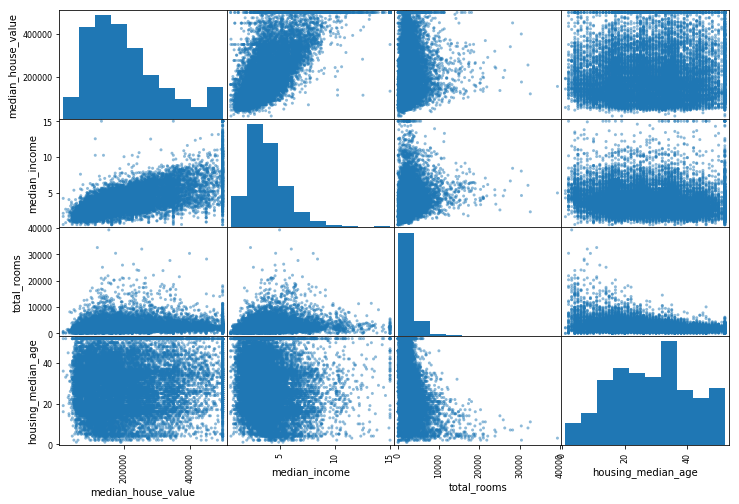

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attributes],figsize=(12,8))

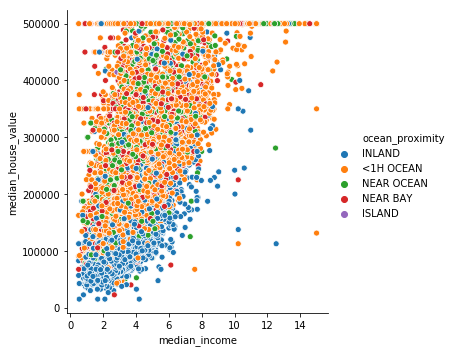

In [24]:
sns.relplot(x="median_income", y="median_house_value", hue="ocean_proximity", data=housing)

### Experimenting with Attribute combinations

In [25]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]

housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]

housing["population_per_household"] = housing["population"]/housing["households"]


In [26]:
corr_matrix = housing.corr()

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.684882
rooms_per_household         0.150228
total_rooms                 0.137900
housing_median_age          0.107475
households                  0.070494
total_bedrooms              0.054245
population                 -0.020036
population_per_household   -0.021860
longitude                  -0.045107
latitude                   -0.146054
bedrooms_per_room          -0.255905
Name: median_house_value, dtype: float64

### Prepare the Data for Machine Learning Algorithm

In [27]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 19464 to 12706
Data columns (total 13 columns):
longitude                   16512 non-null float64
latitude                    16512 non-null float64
housing_median_age          16512 non-null float64
total_rooms                 16512 non-null float64
total_bedrooms              16348 non-null float64
population                  16512 non-null float64
households                  16512 non-null float64
median_income               16512 non-null float64
median_house_value          16512 non-null float64
ocean_proximity             16512 non-null object
rooms_per_household         16512 non-null float64
bedrooms_per_room           16348 non-null float64
population_per_household    16512 non-null float64
dtypes: float64(12), object(1)
memory usage: 1.8+ MB


## Prepare the Data for Machine Learning Algorithms

In [28]:
housing = train_set.drop("median_house_value", axis=1)


housing_label = train_set["median_house_value"].copy()

In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 19464 to 12706
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16348 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [30]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19464,-120.97,37.69,16.0,2793.0,476.0,1279.0,477.0,3.4667,INLAND
13265,-117.65,34.10,30.0,1461.0,341.0,1014.0,345.0,2.4667,INLAND
5829,-118.30,34.19,52.0,2962.0,468.0,1364.0,466.0,4.9042,<1H OCEAN
5111,-118.31,33.96,48.0,2015.0,356.0,1020.0,338.0,4.0625,<1H OCEAN
19761,-122.17,40.11,24.0,1631.0,340.0,1042.0,333.0,1.7708,INLAND


In [31]:
housing.shape

(16512, 9)

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 19464 to 12706
Data columns (total 9 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16348 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [33]:
housing_label.head()

19464    160900.0
13265    106000.0
5829     343500.0
5111     138700.0
19761     59000.0
Name: median_house_value, dtype: float64

In [34]:
housing_label.tail(10)

14563    183900.0
12271    132100.0
14340    418800.0
7375     183300.0
12411     95000.0
6500     131300.0
19857     48000.0
14528    132500.0
899      203200.0
12706    118800.0
Name: median_house_value, dtype: float64

In [35]:
housing_label.shape

(16512,)

### Data Cleaning

Scikit-Learn provides a handy class to take care of missing values:`Imputer`.
Here is how to use it.
First,you need to create an `Imputer` instance,specifying that you want to replace each attribute"s missing values with the median of that attribute:

In [36]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

c:\python365\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Since the median can only be computed on numerical attributes,we need to create a copy of data frame with out the categorical attribute,that is `ocean_proximity` :

In [37]:
housing_num = housing.drop("ocean_proximity",axis=1)

Now you can fit the `imputer` instance to the training data using `fit()` method :


In [38]:
imputer.fit(housing_num)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

The `imputer` has simply computed the median of each attribute and stored the result in its `statistics_` instance variable.

Only the `total_bedrooms` attribute had missing values,but we cannot be sure that there won't be any missing values in new data after the system goes to production,so it is safe to apply the `imputer` to all the numerical attributes:

In [39]:
imputer.statistics_

array([-118.5   ,   34.26  ,   29.    , 2122.    ,  433.    , 1163.5   ,
        408.    ,    3.5391])

In [40]:
housing_num.median().values

array([-118.5   ,   34.26  ,   29.    , 2122.    ,  433.    , 1163.5   ,
        408.    ,    3.5391])

Now you can use this "trained" imputer to transform the training set by replacing missing values by learned medians :

In [41]:
X = imputer.transform(housing_num)

The result is a plain Numpy array containing the transformed features.
If you want to put it back into a Pandas DataFrame, it is simple :

In [42]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns)

In [43]:
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


### Handling Text and Categorical Attributes / Features

Earlier we left out the categoricalattribute `ocean_proximity` brcause it is a categorical attribute so we can not compute its median.

Most Machine Learning alogrithms prefer to work with numbers anyway,so let's convert these categorical labels to numbers.

Scikit-Learn provides a transformer for this task called `LabelEncoder` :


In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing["ocean_proximity"]
housing_cat_encoded = encoder.fit_transform(housing_cat)

In [45]:
housing_cat_encoded

array([1, 1, 0, ..., 0, 0, 1])

This is better : now we can use this numerical data in any ML alogrithm. you can look at the mapping that this encoder has learned using the `classes_` attribute ("<1H OCEAN" is  mapped to 0,"INLAND" is mapped to 1,etc.):


In [46]:
print(encoder.classes_)

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


One issue with this representaion is that ML algorithms will assume that two nearby values are more similar than two distant values.Obviously this is not the case (for example, categories 0 and 4 are more similar than ctegories 0 and 1).To fix this issue,a common solution is to use **one-hot encoding**.

Scikit_Learn provides a `OneHotEncoder` to convert integer categorical values into one-hot vectors.
Lets's encode the categories as one-hot vectors.

In [47]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))

housing_cat_1hot


c:\python365\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output ia a Scipy ***sparse matrix*** instead of of a Numpy array.This is very useful  when you have categorical features with thousands of catgories in it.After one-hot encoding we get a matrix with thousands columns,and the matrix is full of zeros except for one 1 per row. Using up tons of memory space to store zeros would be very waste ful,so instead a sparse matrix only stores the location of the nonzero elemnts.You can use it mostly like a normal 2D array, but if you really want to convert it to a dense Numpy array,just call the `toarray()` method :


In [48]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

We can apply both transformations ( from text categories to integer categories, then from integer categories to one-hot vectors)in one stroke using the `LabelBinarizer` class :

In [49]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

Note that this returns a dense Numpy array by default. you can get a CSR matrix instead by passing `sparse_output= True` to the `LabelBinarizer`constructor.

### Feature Scaling

One of the most important tranformations you need to apply to your data is *feature scaling*.
With few exceptions,Machine Learning algorithms don't perform well when the input numerical attributes have very different scales.

This the case for our housing data: the total number of rooms ranges from about 2 to 39.320, while median income only ranges from 0.5 to 15.

There are four ways to get all attributes to have the same scales:

1. **min-max scaling** (some times also called normalization):based on min and max values of attributes/features

2. **standardization**: based mean and variance of the attributes

3. **robust scaling**: based on median and quartiles of the attributes

4. **normalizers**  : an altogether different scaling, such that each instance or sample has a unit magnitude length, but in different directions so that all samples in a two attibute system falls on the unit circle radius or on a sphere in a multi attribute system.

*Note: scaling the target values is ganerally not requried.*

As with all the transformations, it is important to fit the scalers to the training data set only.not to the full dataset.Only then can you uae them to transform the training set, test set and unseen new data set during prediction.



### Tranformation Pipelines And Column Transformers

In [50]:
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [51]:
numeric_features = ['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['ocean_proximity']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="constant", fill_value="INLAND")),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
housing_prepared = preprocessor.fit_transform(housing)

In [52]:
housing_prepared.shape

(16512, 13)

In [53]:
housing_prepared

array([[-0.70296733,  0.96448516, -1.00252275, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.96040552, -0.71852492,  0.10884978, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63474518, -0.67633246,  1.85529233, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.21592364, -1.27171486, -1.79636028, ...,  0.        ,
         0.        ,  0.        ],
       [-1.20398325,  0.89416441, -0.04991773, ...,  0.        ,
         0.        ,  0.        ],
       [-0.91339402,  1.39109774, -0.52622024, ...,  0.        ,
         0.        ,  0.        ]])

### Select and Train a Model

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
lin_reg = LinearRegression()

lin_reg.fit(housing_prepared, housing_label)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Done! We now have a working Linear Regression model. Let's try it out ona few instances from the training set :

In [56]:
some_data = housing.iloc[:5]

some_labels = housing_label.iloc[:5]

some_data_prepared = preprocessor.transform(some_data)

print("Predictions:{}".format(lin_reg.predict(some_data_prepared)))

print("Real_Labels:", list(some_labels))


Predictions:[133962.99572648 110437.70984926 280917.97072474 250167.46196906
  41468.57756601]
Real_Labels: [160900.0, 106000.0, 343500.0, 138700.0, 59000.0]


In [57]:
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label,housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


69056.4655093112

In [58]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [59]:
housing_prediction = tree_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label,housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse


0.0

**What zero error?  "Zero Error" !!!** ""No error at all !"" something fishy ? !

It is much more likely that the model has badly **overfit** the data.How can we be sure?.
We can not use the the test set, as of now as we are not sure about our model.

So.we need to use part of the training set for training and part for "model validation".Enter the world of "Validation and Cross Validation"

***NOTE:*** Need to explain the concept of **overfit and underfit** breifly here and how to overcome them.


### Better Evaluation Using Cross-Validation

A great way to evaluate model is to use **Scikit-Learning's** *corss-validation* feature.
The following code performs *K-fold cross-validation*:
it randomly splits the training set into 10 distict subsets called *folds*, (here K=10).Then it trains and evaluates the Decision Tree model 10 times,picking a different fold for evalution every time and training on the remaining on the other 9 folds.The result is an array containing the 10 evaluation scores.


In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=10)
tree_rmse_scores = np.sqrt(-scores)

Let's look at the results:

In [61]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard devation:", scores.std())

In [62]:
display_scores(tree_rmse_scores)

Scores: [68584.28092324 69637.73112536 69511.76782514 67683.30808893
 64608.36942431 70966.82101918 63126.25047863 64898.96842699
 65602.18508361 68306.98135031]
Mean: 67292.66637457094
Standard devation: 2447.955159753576


Let's comupte the same scores for Linear Regression model:

In [63]:
scores = cross_val_score(lin_reg,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=10)
lin_rmse_scores = np.sqrt(-scores)
display_scores(lin_rmse_scores)

Scores: [70916.83178659 72022.01931972 68152.78049512 71924.44578453
 68357.30058434 67334.7730317  67422.96007352 69894.34131423
 67918.92860859 68029.58506324]
Mean: 69197.39660615989
Standard devation: 1739.8482668146069


Let's try one last model now: the **RandomForestRegressor**.
Random Forests work by by training many Decision Tress on random subsets of the features, the averaging out their predictions.

Building a model on top of many other models is called **Ensemble Learning**,and it is a great way to push the performance of ML alogrithms even further.

In [64]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=100)
forest_reg.fit(housing_prepared,housing_label)
housing_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_label,housing_prediction)
forest_rmse = np.sqrt(forest_mse)
forest_rmse


18154.699321388678

In [65]:
scores = cross_val_score(forest_reg,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=10)
forest_rmse_scores = np.sqrt(-scores)
display_scores(forest_rmse_scores)

Scores: [50133.04431592 51160.43116836 49357.4865167  50655.24393659
 46877.77682821 48216.47787219 45923.78580148 48965.40017418
 46851.48432474 48650.31589436]
Mean: 48679.14468327331
Standard devation: 1646.5062298987525


Wow! this is much better: Random Forests look very promising.
However note that the score on the training set is still much lower than on the validation sets,meaning that the model is still overfitting the training set.

Possible sloutions for overfitting are:
1. choose a altenative simple model
2. Use some regularization technique (constrain the model)
3. Get lot more training data.

The Random Forests model looks promising and you can tweak the model by spending some time playing with hyper-parameters. However you can also try out few more models form various categories of Machine Learning Alogritms like SVM with different kernels or Neural Networks etc., before zeroing on a final model to test and launch.

### Persistence of Models

You should save every model you experiment with, so you can come back easily to any model you want.
You can easily save Scikit-Learn models by using Python's **Pickel** module or using `sklearn.externals.joblib`,which is more effcient at serializing large Numpy arrays:

In [66]:
from sklearn.externals import joblib

In [67]:
joblib.dump(forest_reg,"My_Random_Forest_Model_V01")

['My_Random_Forest_Model_V01']

### Summary

We can see that the **Random Forest** performed better compared to **Linear Regression**and **Decision Tree algorithms** for our housing dataset.So we can zero-in on it and do the next step that is finding the best hyper-parameters using the *Grid Search* or *Random Search* techinque, which will be dicussed in a separate NoteBook.